In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
# 2. Recolección y Entendimiento de los Datos
ruta = "bank.csv"
data = pd.read_csv(ruta)
# Seleccionar una muestra aleatoria del 10% de tus datos
#data_sample = data.sample(frac=0.1, random_state=42)
print(data.head())
print(data.info())
print(data.describe())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

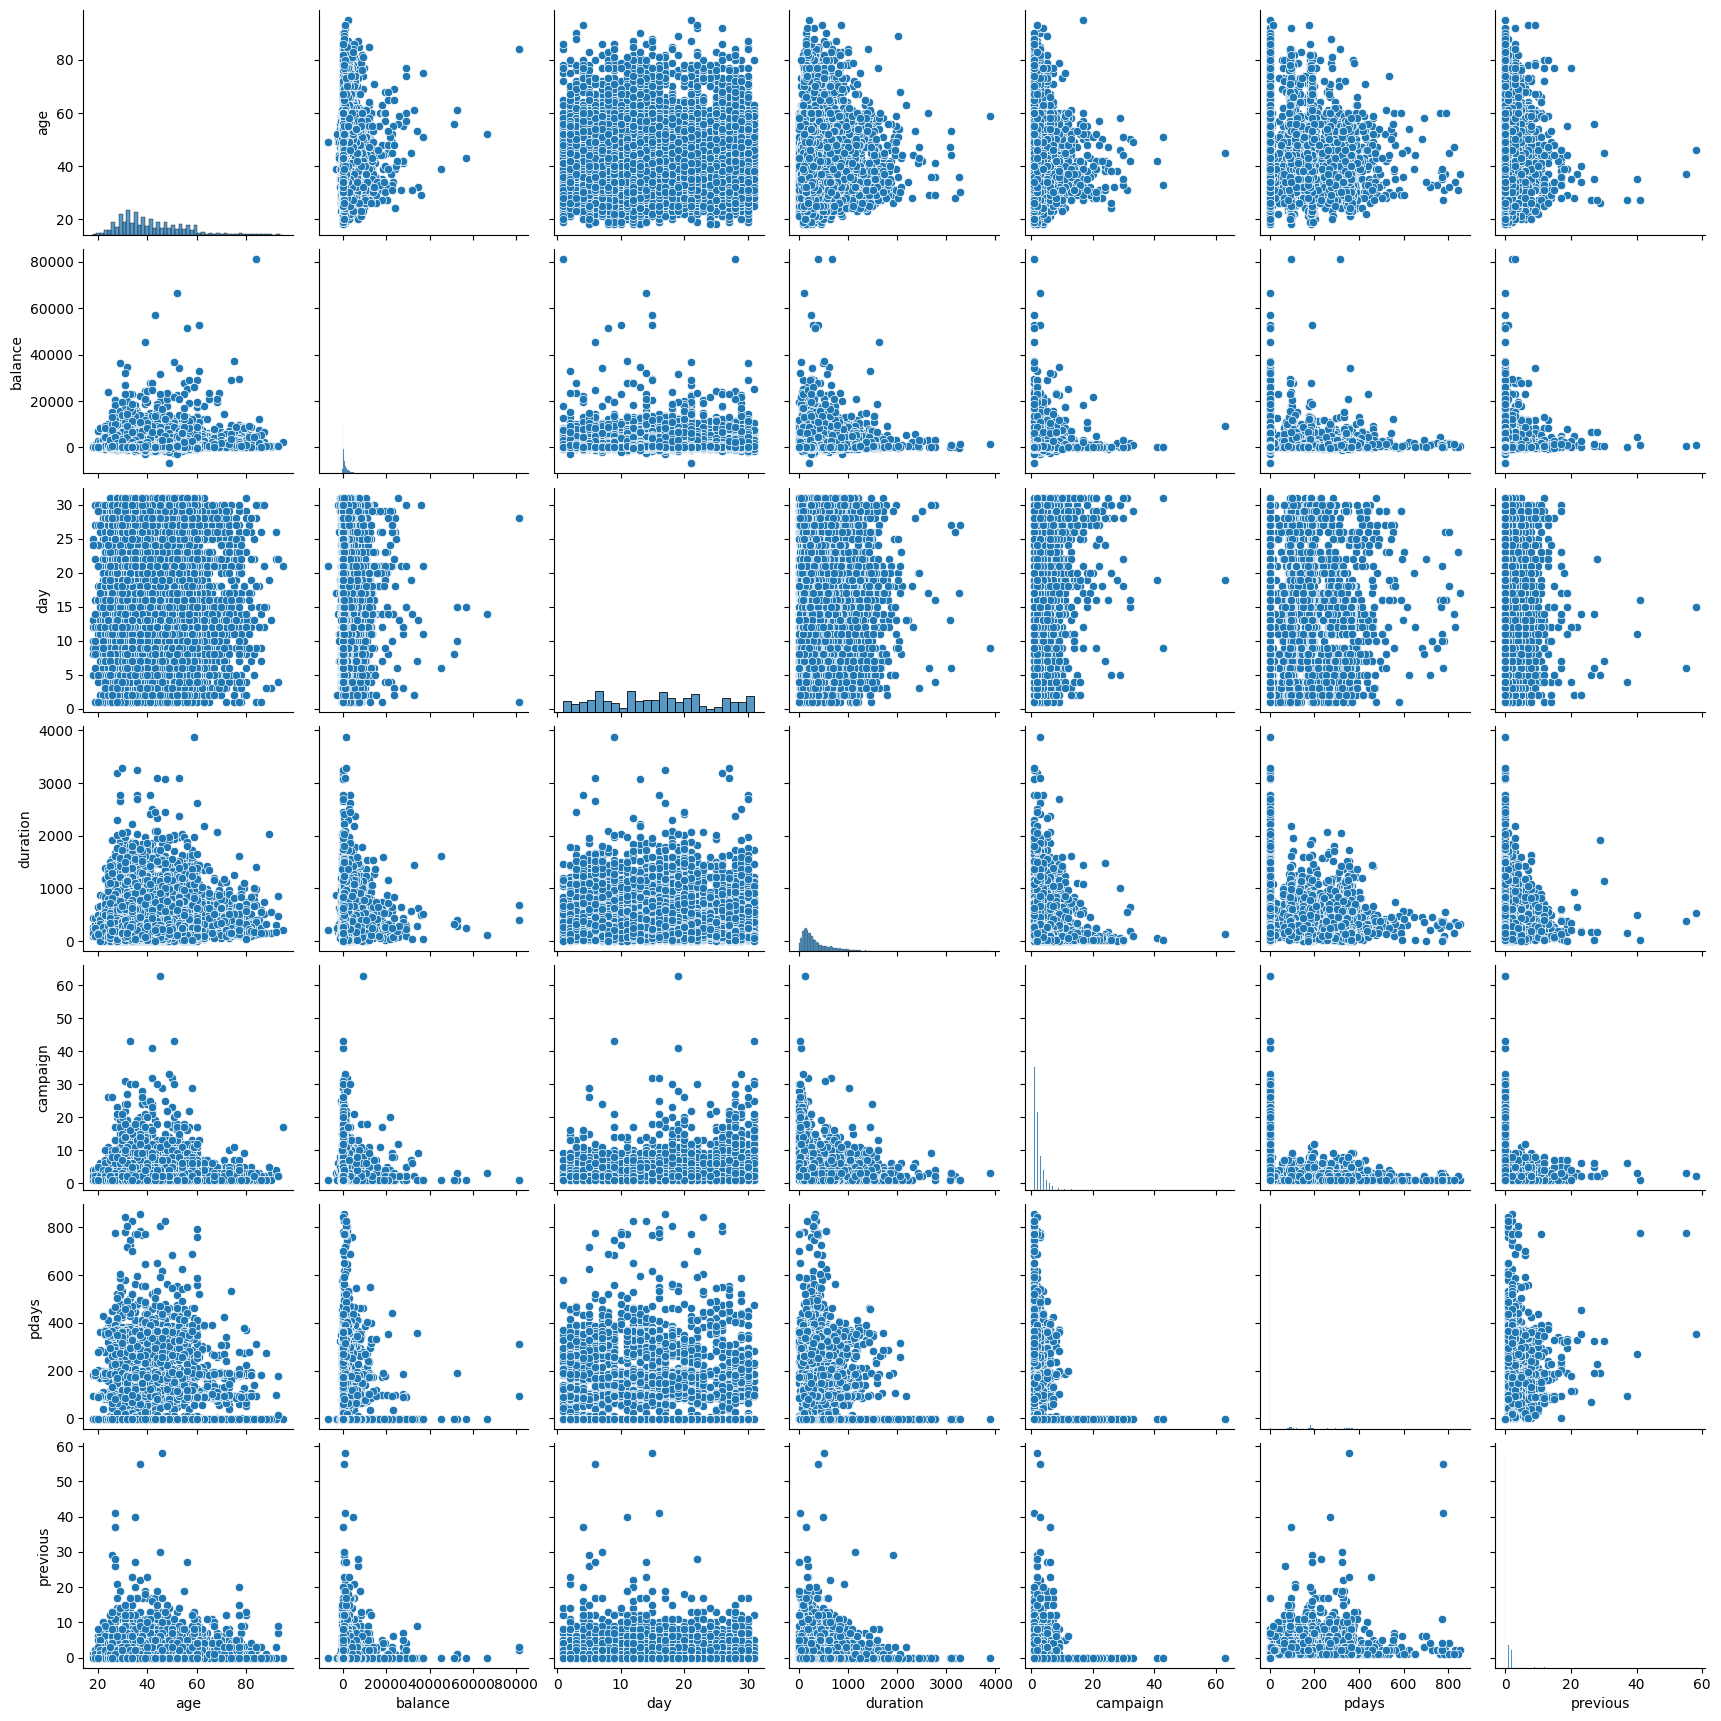

In [6]:
# Visualización de los datos
sns.pairplot(data)
plt.show()

In [9]:
#Edad promedio 
data['age'].mean()

data.describe()
#data.info

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


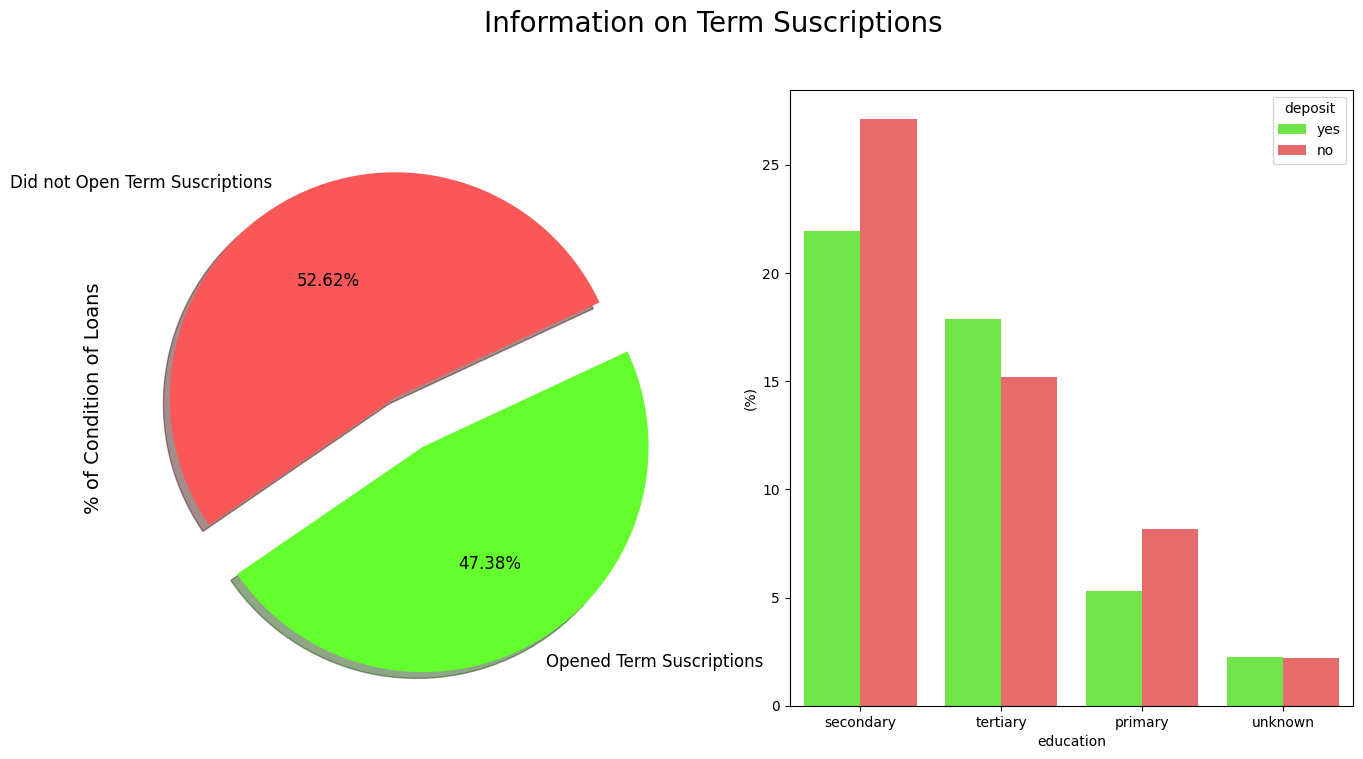

In [11]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=data, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(data["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

C:\Users\cesar\AppData\Local\Temp\ipykernel_22048\225643877.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


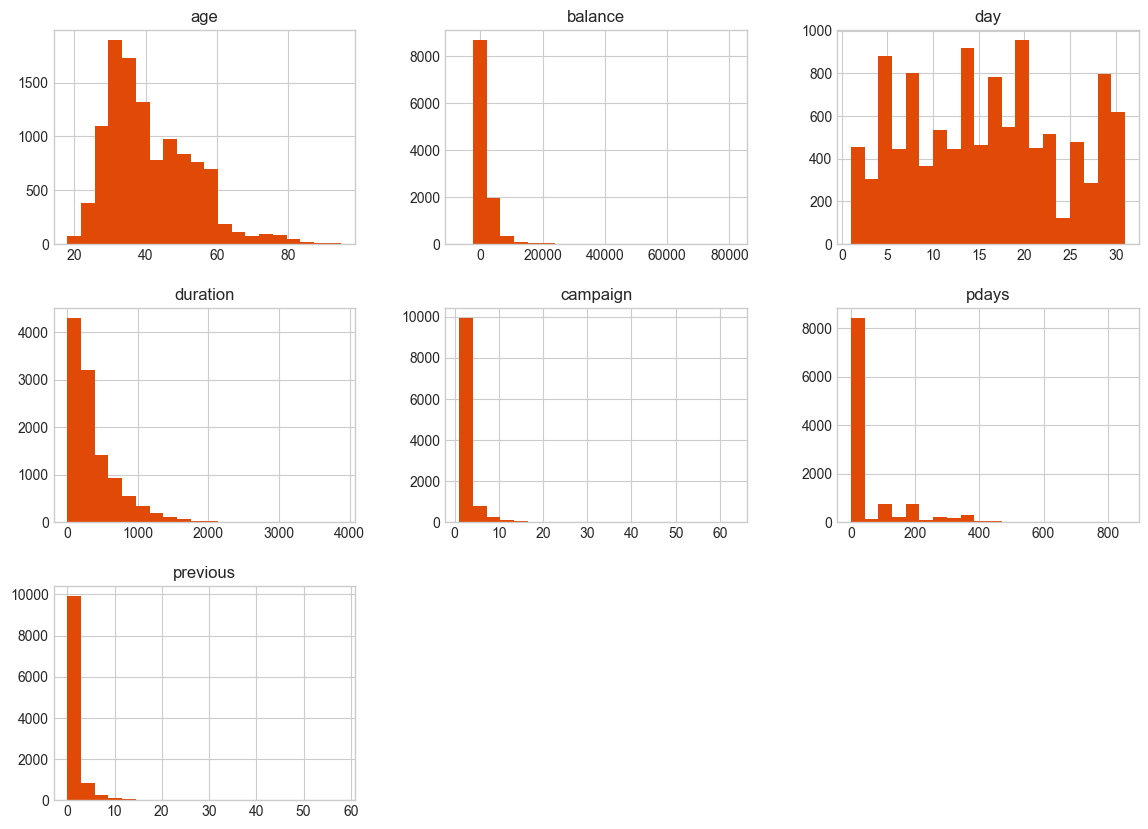

In [12]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [13]:
data['deposit'].value_counts()


no     5873
yes    5289
Name: deposit, dtype: int64

In [15]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

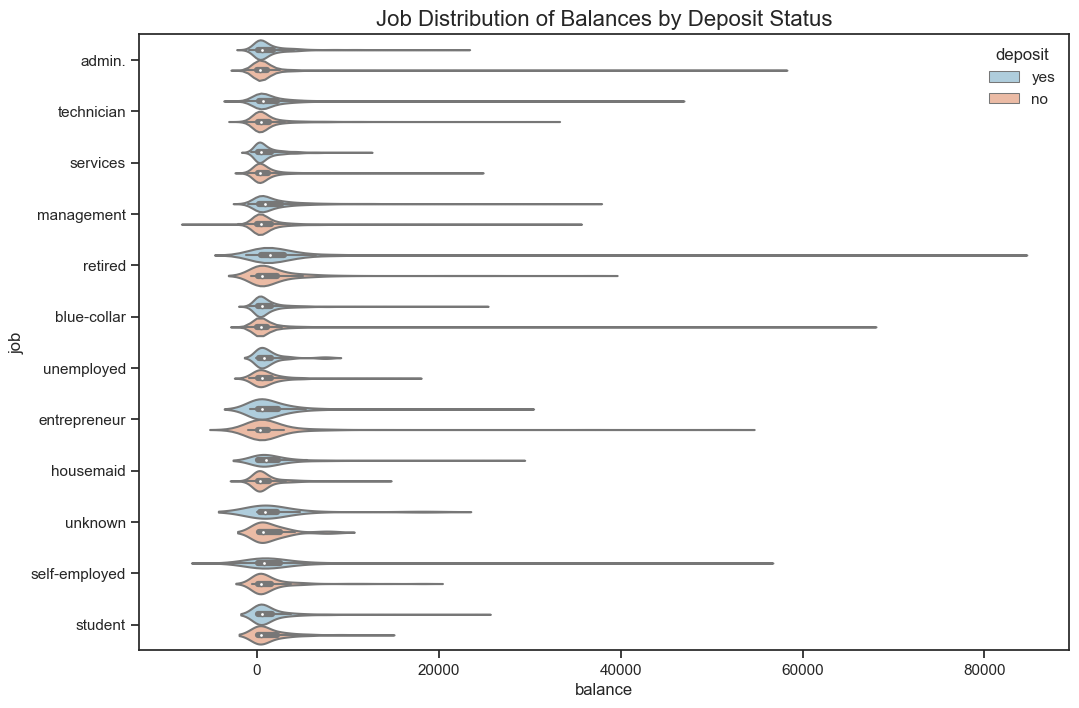

In [29]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=data);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

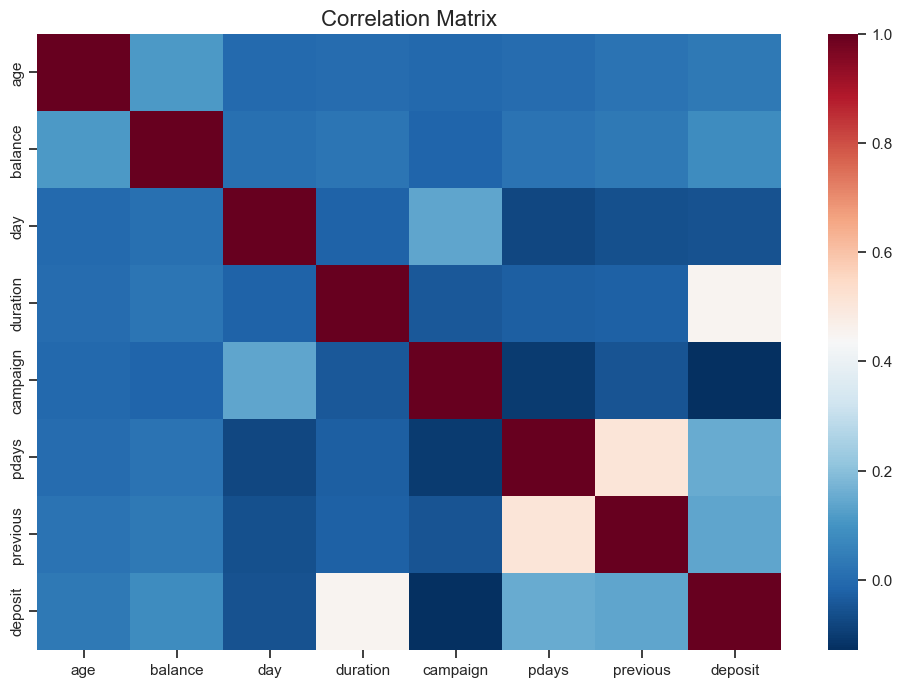

In [30]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
data['deposit'] = LabelEncoder().fit_transform(data['deposit'])



# Separate both dataframes into 
numeric_data = data.select_dtypes(exclude="object")
# categorical_data = data.select_dtypes(include="object")

corr_numeric = numeric_data.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

[       age          job  marital  education default  balance housing loan  \
 0       59       admin.  married  secondary      no     2343     yes   no   
 1       56       admin.  married  secondary      no       45      no   no   
 2       41   technician  married  secondary      no     1270     yes   no   
 3       55     services  married  secondary      no     2476     yes   no   
 4       54       admin.  married   tertiary      no      184      no   no   
 ...    ...          ...      ...        ...     ...      ...     ...  ...   
 11157   33  blue-collar   single    primary      no        1     yes   no   
 11158   39     services  married  secondary      no      733      no   no   
 11159   32   technician   single  secondary      no       29      no   no   
 11160   43   technician  married  secondary      no        0      no  yes   
 11161   34   technician  married  secondary      no        0      no   no   
 
         contact  day month  duration  campaign  pdays  previo

In [32]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

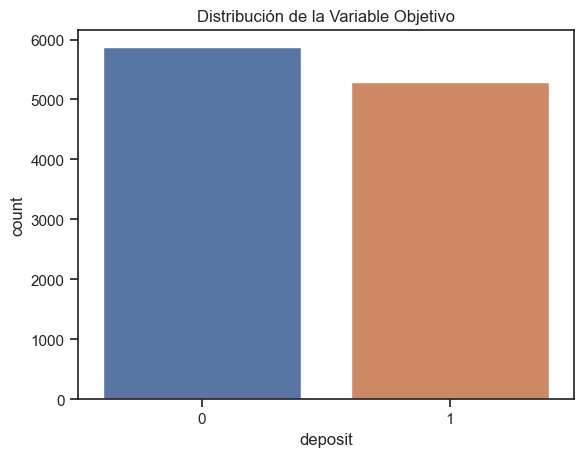

C:\Users\cesar\AppData\Local\Temp\ipykernel_22048\1883696860.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


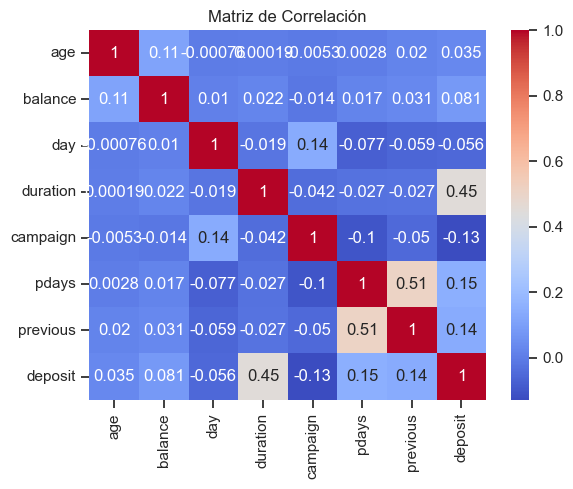

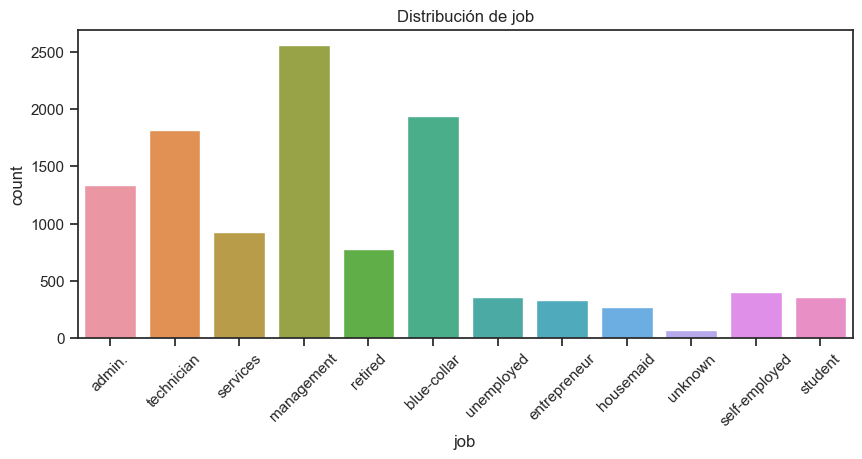

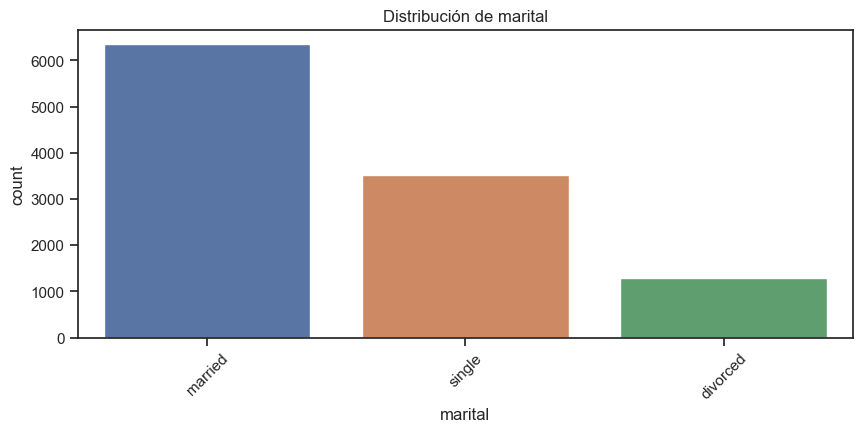

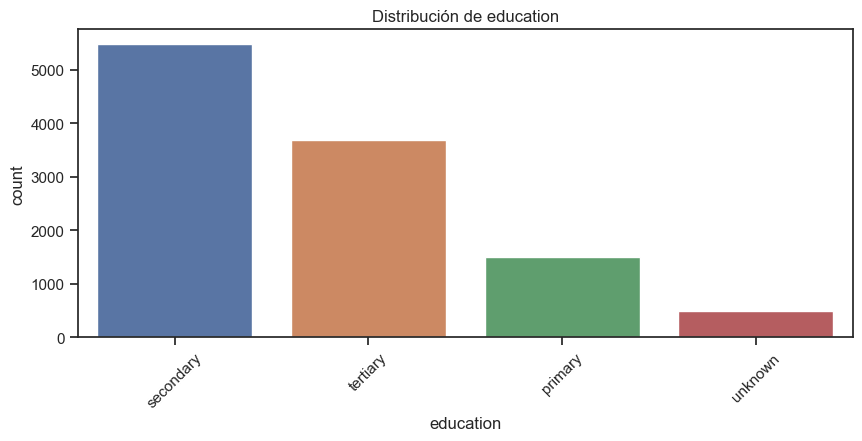

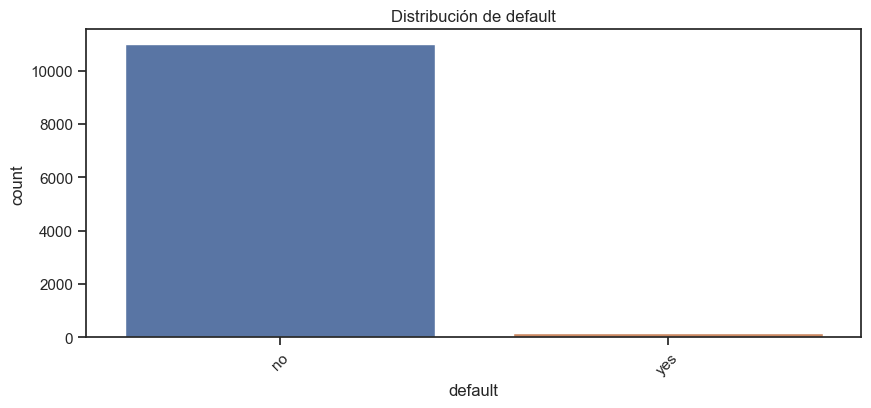

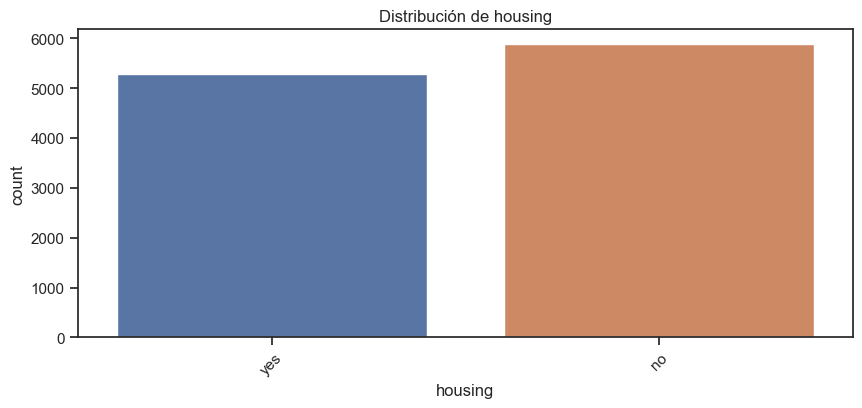

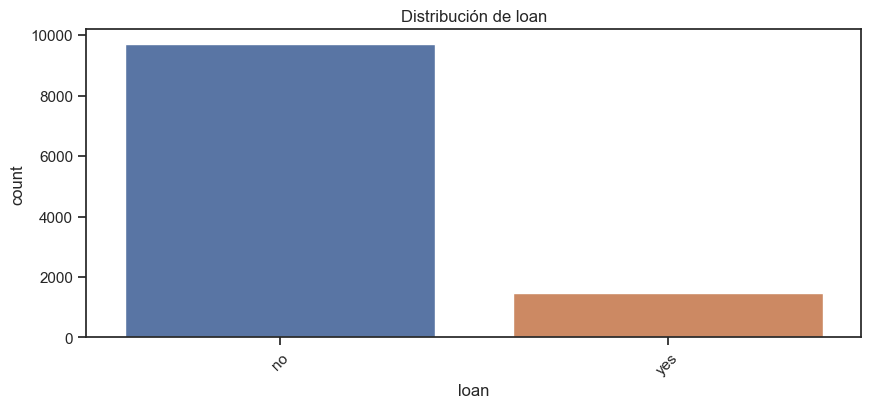

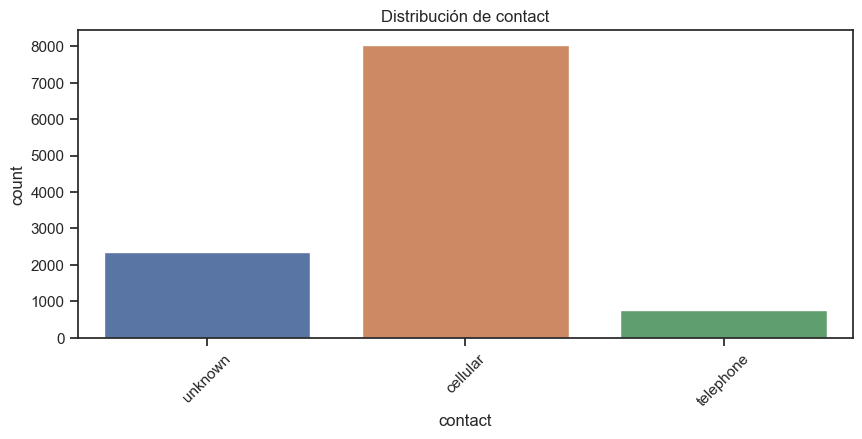

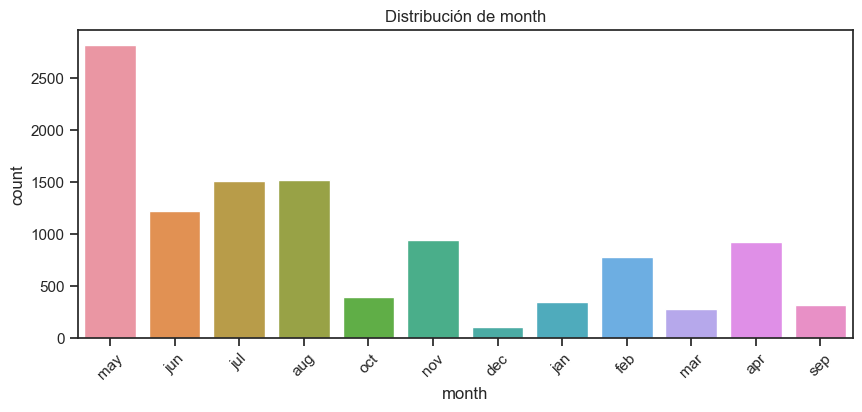

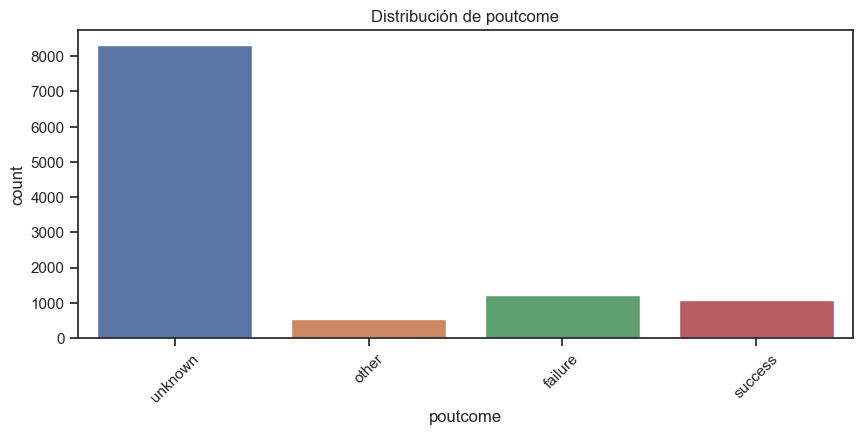

In [34]:


# Visualización de la distribución de la variable objetivo
sns.countplot(x='deposit', data=data)
plt.title('Distribución de la Variable Objetivo')
plt.show()

# Ver la correlación entre variables numéricas
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Analizar distribuciones de variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


In [35]:
#Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Verificar si hay valores faltantes
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


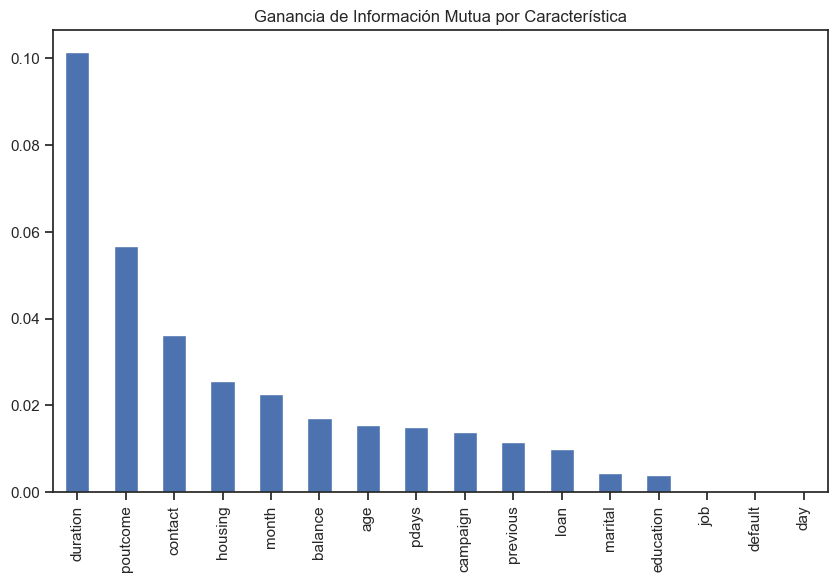

In [36]:
#Selección de Características con Ganancia de Información Mutua
from sklearn.feature_selection import mutual_info_classif

# Separar las características y la variable objetivo
X = data.drop('deposit', axis=1)
y = data['deposit']

# Calcular la ganancia de información mutua
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title('Ganancia de Información Mutua por Característica')
plt.show()

# Seleccionar las características más importantes (opcional)
selected_features = mutual_info_series[mutual_info_series > 0.01].index
X_selected = X[selected_features]


In [39]:
#Comparación de Algoritmos con Lazy Predict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Usar Lazy Predict para comparar modelos
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

# Ver los resultados
print(models.head())


100%|██████████| 29/29 [00:17<00:00,  1.63it/s]

[LightGBM] [Info] Number of positive: 3682, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 7813, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471266 -> initscore=-0.115063
[LightGBM] [Info] Start training from score -0.115063
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
LGBMClassifier              0.84               0.84     0.84      0.84   
XGBClassifier               0.84               0.84     0.84      0.84   
RandomForestClassifier      0.83               0.83     0.83      0.83   
ExtraTreesClassifier        0.83               0.83     0.83      0.83   
SV

In [40]:
#Elección del Mejor Modelo y Entrenamiento Final
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el mejor modelo (ejemplo con RandomForest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1742
           1       0.81      0.86      0.83      1607

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.84      0.83      0.83      3349

[[1410  332]
 [ 225 1382]]


In [ ]:
#Registro de Métricas y Modelos con MLFlow
import mlflow
import mlflow.sklearn

# Iniciar una nueva corrida en MLFlow
with mlflow.start_run():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Registrar las métricas
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred, pos_label='yes'))
    
    # Registrar el modelo
    mlflow.sklearn.log_model(model, "random_forest_model")
    
    # Registrar el artefacto de la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
